In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

In [45]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

## Analisando os campos

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Temos valores faltantes em Cabin, Age e Embarked. 

Como embarked temos apenas 2 valores faltantes, se formos utilizar essa feature, vamos retirar os dados faltantes.

### Analisando os valores faltantes

In [47]:
source = train

alt.Chart(source).mark_bar().encode(
    alt.X("Age:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [48]:
alt.Chart(source).mark_bar().encode(
    alt.X("SibSp:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [49]:
alt.Chart(source).mark_bar().encode(
    alt.X("Parch:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [50]:
alt.Chart(source).mark_bar().encode(
    alt.X("Fare:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [51]:
train['norm_fare'] = np.log(train.Fare+1)

In [52]:
alt.Chart(source).mark_bar().encode(
    alt.X("norm_fare:Q", bin=True),
    y='count()',
)

alt.Chart(...)

Cabin é um objeto, vamos analisar de outra forma

In [53]:
train.Cabin.values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

Como as cabines são valores de texto, vamos deixar os valores sem informação, como sem informação. e vamos utilizar as outras informações das cabines como uma feature. 

In [54]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,norm_fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


In [55]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [56]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [57]:
train.Age = train.Age.fillna(train.Age.median())

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  norm_fare    891 non-null    float64
 13  cabin_adv    891 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [59]:
train.dropna(subset=['Embarked'],inplace = True)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  norm_fare    889 non-null    float64
 13  cabin_adv    889 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 104.2+ KB


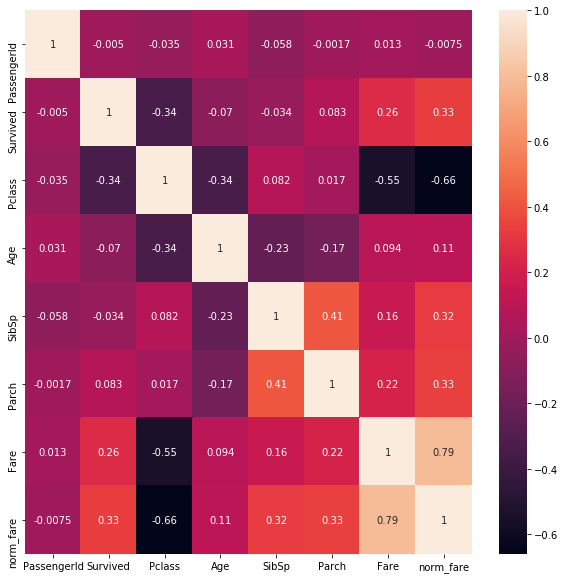

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

In [62]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           202 non-null    object 
 11  Embarked        889 non-null    object 
 12  norm_fare       889 non-null    float64
 13  cabin_adv       889 non-null    object 
 14  numeric_ticket  889 non-null    int64  
 15  ticket_letters  889 non-null    object 
dtypes: float64(3), int64(6), object(7)
memory usage: 118.1+ KB


In [64]:
base_model = pd.concat([train,pd.get_dummies(train[['Sex','Embarked','cabin_adv']])],axis=1) 

In [65]:
base_model.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'norm_fare',
       'cabin_adv', 'numeric_ticket', 'ticket_letters', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A',
       'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E',
       'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n'],
      dtype='object')

In [66]:
base_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           202 non-null    object 
 11  Embarked        889 non-null    object 
 12  norm_fare       889 non-null    float64
 13  cabin_adv       889 non-null    object 
 14  numeric_ticket  889 non-null    int64  
 15  ticket_letters  889 non-null    object 
 16  Sex_female      889 non-null    uint8  
 17  Sex_male        889 non-null    uin

In [67]:
col = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch',
       'numeric_ticket', 'norm_fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A',
       'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E',
       'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n']

In [68]:
df = base_model[col].copy()

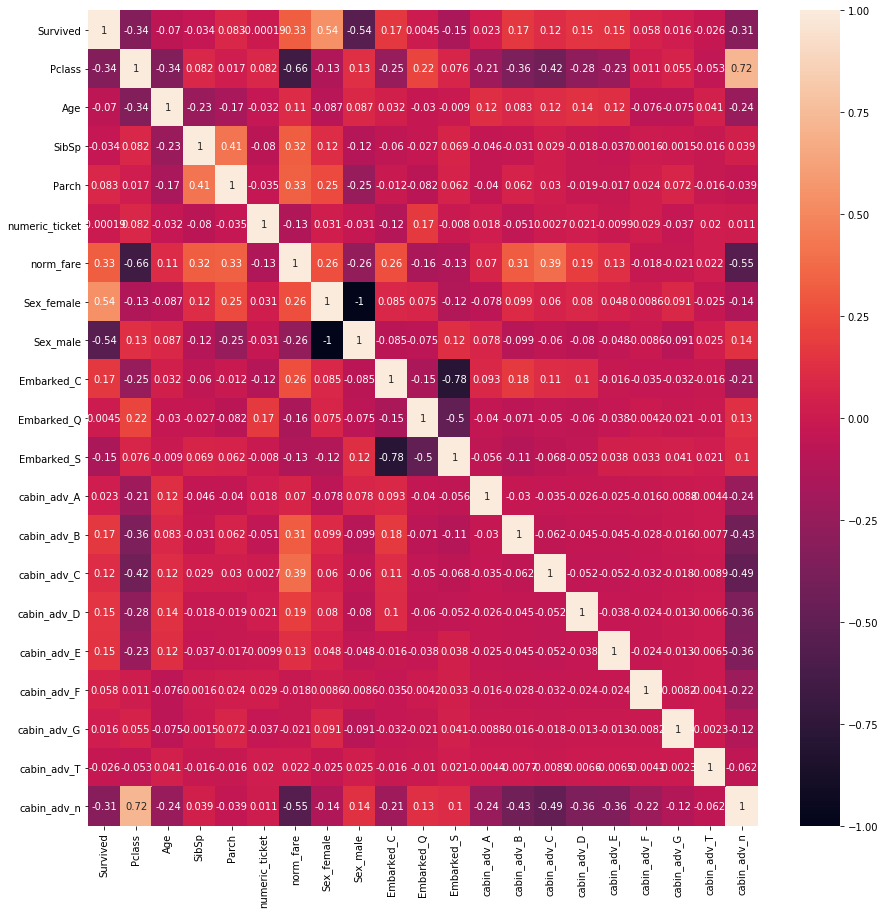

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [70]:
df.drop(columns=["Embarked_C",'Sex_female','Pclass'], inplace=True)

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Age             889 non-null    float64
 2   SibSp           889 non-null    int64  
 3   Parch           889 non-null    int64  
 4   numeric_ticket  889 non-null    int64  
 5   norm_fare       889 non-null    float64
 6   Sex_male        889 non-null    uint8  
 7   Embarked_Q      889 non-null    uint8  
 8   Embarked_S      889 non-null    uint8  
 9   cabin_adv_A     889 non-null    uint8  
 10  cabin_adv_B     889 non-null    uint8  
 11  cabin_adv_C     889 non-null    uint8  
 12  cabin_adv_D     889 non-null    uint8  
 13  cabin_adv_E     889 non-null    uint8  
 14  cabin_adv_F     889 non-null    uint8  
 15  cabin_adv_G     889 non-null    uint8  
 16  cabin_adv_T     889 non-null    uint8  
 17  cabin_adv_n     889 non-null    uin

In [73]:
source = df

alt.Chart(source).mark_bar().encode(
    alt.X("Age:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [74]:
df.describe()

,Survived,Age,SibSp,Parch,numeric_ticket,norm_fare,Sex_male,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.315152,0.524184,0.382452,0.741282,2.959024,0.649044,0.086614,0.724409,0.016873,0.050619,0.066367,0.037120,0.035996,0.014623,0.004499,0.001125,0.772778
std,0.486260,12.984932,1.103705,0.806761,0.438177,0.967750,0.477538,0.281427,0.447063,0.128868,0.219341,0.249062,0.189163,0.186384,0.120106,0.066964,0.033539,0.419273
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,0.000000,0.000000,1.000000,2.737881,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,1.000000,3.465736,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,1.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

train_scaled = df.copy()

scale.fit(train_scaled[['Age','SibSp','Parch','norm_fare']])

train_scaled[['Age','SibSp','Parch','norm_fare']] = scale.transform(train_scaled[['Age','SibSp','Parch','norm_fare']])


In [76]:
X = train_scaled.drop(columns=['Survived']).copy()
y = train_scaled.Survived.copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 456 )

## Neural com Keras

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [78]:
print(f' Shape de X {X.shape}')
print(f' Shape de y {y.shape}')

 Shape de X (889, 17)
 Shape de y (889,)


In [79]:
model = Sequential()
model.add(Dense(8, input_dim=17, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
opt = optimizers.Adam(learning_rate=0.0001)
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=1000, batch_size=8, callbacks=[es])
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/1000
89/89 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.6540 - val_loss: 0.6927 - val_accuracy: 0.6798
Epoch 2/1000
89/89 [==============================] - 0s 641us/step - loss: 0.6862 - accuracy: 0.6610 - val_loss: 0.6912 - val_accuracy: 0.6742
Epoch 3/1000
89/89 [==============================] - 0s 641us/step - loss: 0.6846 - accuracy: 0.6723 - val_loss: 0.6897 - val_accuracy: 0.6854
Epoch 4/1000
89/89 [==============================] - 0s 652us/step - loss: 0.6831 - accuracy: 0.6723 - val_loss: 0.6883 - val_accuracy: 0.6742
Epoch 5/1000
89/89 [==============================] - 0s 641us/step - loss: 0.6815 - accuracy: 0.6709 - val_loss: 0.6868 - val_accuracy: 0.6685
Epoch 6/1000
89/89 [==============================] - 0s 641us/step - loss: 0.6799 - accuracy: 0.6751 - val_loss: 0.6854 - val_accuracy: 0.6685
Epoch 7/1000
89/89 [==============================] - 0s 652us/step - loss: 0.6784 - accuracy: 0.6751 - val_loss: 0.6840 - val_accuracy: 0

89/89 [==============================] - 0s 629us/step - loss: 0.5269 - accuracy: 0.7665 - val_loss: 0.5245 - val_accuracy: 0.7360
Epoch 58/1000
89/89 [==============================] - 0s 652us/step - loss: 0.5237 - accuracy: 0.7665 - val_loss: 0.5212 - val_accuracy: 0.7360
Epoch 59/1000
89/89 [==============================] - 0s 641us/step - loss: 0.5206 - accuracy: 0.7693 - val_loss: 0.5185 - val_accuracy: 0.7360
Epoch 60/1000
89/89 [==============================] - 0s 652us/step - loss: 0.5177 - accuracy: 0.7707 - val_loss: 0.5153 - val_accuracy: 0.7360
Epoch 61/1000
89/89 [==============================] - 0s 629us/step - loss: 0.5147 - accuracy: 0.7722 - val_loss: 0.5121 - val_accuracy: 0.7360
Epoch 62/1000
89/89 [==============================] - 0s 629us/step - loss: 0.5119 - accuracy: 0.7736 - val_loss: 0.5093 - val_accuracy: 0.7303
Epoch 63/1000
89/89 [==============================] - 0s 674us/step - loss: 0.5090 - accuracy: 0.7722 - val_loss: 0.5065 - val_accuracy: 0.7360

89/89 [==============================] - 0s 663us/step - loss: 0.4450 - accuracy: 0.8129 - val_loss: 0.4439 - val_accuracy: 0.7865
Epoch 114/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4443 - accuracy: 0.8115 - val_loss: 0.4433 - val_accuracy: 0.7865
Epoch 115/1000
89/89 [==============================] - 0s 652us/step - loss: 0.4438 - accuracy: 0.8143 - val_loss: 0.4429 - val_accuracy: 0.7865
Epoch 116/1000
89/89 [==============================] - 0s 652us/step - loss: 0.4432 - accuracy: 0.8143 - val_loss: 0.4422 - val_accuracy: 0.7865
Epoch 117/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4426 - accuracy: 0.8115 - val_loss: 0.4416 - val_accuracy: 0.7921
Epoch 118/1000
89/89 [==============================] - 0s 663us/step - loss: 0.4421 - accuracy: 0.8129 - val_loss: 0.4410 - val_accuracy: 0.7921
Epoch 119/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4415 - accuracy: 0.8129 - val_loss: 0.4405 - val_accuracy: 

89/89 [==============================] - 0s 641us/step - loss: 0.4235 - accuracy: 0.8200 - val_loss: 0.4212 - val_accuracy: 0.8090
Epoch 170/1000
89/89 [==============================] - 0s 652us/step - loss: 0.4233 - accuracy: 0.8200 - val_loss: 0.4210 - val_accuracy: 0.8090
Epoch 171/1000
89/89 [==============================] - 0s 663us/step - loss: 0.4229 - accuracy: 0.8200 - val_loss: 0.4206 - val_accuracy: 0.8090
Epoch 172/1000
89/89 [==============================] - 0s 652us/step - loss: 0.4227 - accuracy: 0.8228 - val_loss: 0.4203 - val_accuracy: 0.8090
Epoch 173/1000
89/89 [==============================] - 0s 652us/step - loss: 0.4224 - accuracy: 0.8228 - val_loss: 0.4202 - val_accuracy: 0.8090
Epoch 174/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4222 - accuracy: 0.8228 - val_loss: 0.4198 - val_accuracy: 0.8090
Epoch 175/1000
89/89 [==============================] - 0s 663us/step - loss: 0.4218 - accuracy: 0.8242 - val_loss: 0.4195 - val_accuracy: 

89/89 [==============================] - 0s 641us/step - loss: 0.4107 - accuracy: 0.8270 - val_loss: 0.4085 - val_accuracy: 0.8202
Epoch 226/1000
89/89 [==============================] - 0s 663us/step - loss: 0.4105 - accuracy: 0.8270 - val_loss: 0.4082 - val_accuracy: 0.8202
Epoch 227/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4104 - accuracy: 0.8228 - val_loss: 0.4080 - val_accuracy: 0.8202
Epoch 228/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4101 - accuracy: 0.8270 - val_loss: 0.4079 - val_accuracy: 0.8202
Epoch 229/1000
89/89 [==============================] - 0s 652us/step - loss: 0.4099 - accuracy: 0.8284 - val_loss: 0.4076 - val_accuracy: 0.8202
Epoch 230/1000
89/89 [==============================] - 0s 663us/step - loss: 0.4097 - accuracy: 0.8284 - val_loss: 0.4074 - val_accuracy: 0.8202
Epoch 231/1000
89/89 [==============================] - 0s 663us/step - loss: 0.4095 - accuracy: 0.8270 - val_loss: 0.4072 - val_accuracy: 

89/89 [==============================] - 0s 641us/step - loss: 0.4005 - accuracy: 0.8242 - val_loss: 0.4001 - val_accuracy: 0.8258
Epoch 282/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4004 - accuracy: 0.8242 - val_loss: 0.4001 - val_accuracy: 0.8202
Epoch 283/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4003 - accuracy: 0.8242 - val_loss: 0.4001 - val_accuracy: 0.8202
Epoch 284/1000
89/89 [==============================] - 0s 641us/step - loss: 0.4002 - accuracy: 0.8242 - val_loss: 0.4000 - val_accuracy: 0.8202
Epoch 285/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3999 - accuracy: 0.8242 - val_loss: 0.3999 - val_accuracy: 0.8202
Epoch 286/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3998 - accuracy: 0.8242 - val_loss: 0.3998 - val_accuracy: 0.8258
Epoch 287/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3996 - accuracy: 0.8242 - val_loss: 0.3996 - val_accuracy: 

89/89 [==============================] - 0s 663us/step - loss: 0.3930 - accuracy: 0.8242 - val_loss: 0.3960 - val_accuracy: 0.8146
Epoch 338/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3927 - accuracy: 0.8256 - val_loss: 0.3960 - val_accuracy: 0.8146
Epoch 339/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3927 - accuracy: 0.8242 - val_loss: 0.3957 - val_accuracy: 0.8146
Epoch 340/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3925 - accuracy: 0.8256 - val_loss: 0.3959 - val_accuracy: 0.8146
Epoch 341/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3924 - accuracy: 0.8242 - val_loss: 0.3957 - val_accuracy: 0.8146
Epoch 342/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3923 - accuracy: 0.8270 - val_loss: 0.3957 - val_accuracy: 0.8146
Epoch 343/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3922 - accuracy: 0.8256 - val_loss: 0.3957 - val_accuracy: 

89/89 [==============================] - 0s 652us/step - loss: 0.3872 - accuracy: 0.8298 - val_loss: 0.3940 - val_accuracy: 0.8034
Epoch 394/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3871 - accuracy: 0.8312 - val_loss: 0.3941 - val_accuracy: 0.8034
Epoch 395/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3870 - accuracy: 0.8298 - val_loss: 0.3942 - val_accuracy: 0.8034
Epoch 396/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3870 - accuracy: 0.8284 - val_loss: 0.3943 - val_accuracy: 0.8034
Epoch 397/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3869 - accuracy: 0.8298 - val_loss: 0.3941 - val_accuracy: 0.8034
Epoch 398/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3867 - accuracy: 0.8298 - val_loss: 0.3943 - val_accuracy: 0.8034
Epoch 399/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3867 - accuracy: 0.8312 - val_loss: 0.3941 - val_accuracy: 

89/89 [==============================] - 0s 641us/step - loss: 0.3825 - accuracy: 0.8312 - val_loss: 0.3931 - val_accuracy: 0.7978
Epoch 450/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3825 - accuracy: 0.8312 - val_loss: 0.3932 - val_accuracy: 0.7978
Epoch 451/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3824 - accuracy: 0.8312 - val_loss: 0.3932 - val_accuracy: 0.7978
Epoch 452/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3823 - accuracy: 0.8312 - val_loss: 0.3932 - val_accuracy: 0.7978
Epoch 453/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3823 - accuracy: 0.8312 - val_loss: 0.3931 - val_accuracy: 0.8034
Epoch 454/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3822 - accuracy: 0.8312 - val_loss: 0.3932 - val_accuracy: 0.8034
Epoch 455/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3821 - accuracy: 0.8312 - val_loss: 0.3932 - val_accuracy: 

89/89 [==============================] - 0s 663us/step - loss: 0.3792 - accuracy: 0.8383 - val_loss: 0.3939 - val_accuracy: 0.8258
Epoch 506/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3790 - accuracy: 0.8383 - val_loss: 0.3938 - val_accuracy: 0.8258
Epoch 507/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3789 - accuracy: 0.8383 - val_loss: 0.3939 - val_accuracy: 0.8258
Epoch 508/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3788 - accuracy: 0.8383 - val_loss: 0.3939 - val_accuracy: 0.8315
Epoch 509/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3789 - accuracy: 0.8383 - val_loss: 0.3939 - val_accuracy: 0.8315
Epoch 510/1000
89/89 [==============================] - 0s 629us/step - loss: 0.3787 - accuracy: 0.8383 - val_loss: 0.3939 - val_accuracy: 0.8258
Epoch 511/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3787 - accuracy: 0.8383 - val_loss: 0.3940 - val_accuracy: 

89/89 [==============================] - 0s 641us/step - loss: 0.3755 - accuracy: 0.8354 - val_loss: 0.3951 - val_accuracy: 0.8371
Epoch 562/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3755 - accuracy: 0.8354 - val_loss: 0.3952 - val_accuracy: 0.8371
Epoch 563/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3754 - accuracy: 0.8368 - val_loss: 0.3954 - val_accuracy: 0.8371
Epoch 564/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3753 - accuracy: 0.8354 - val_loss: 0.3954 - val_accuracy: 0.8371
Epoch 565/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3752 - accuracy: 0.8368 - val_loss: 0.3953 - val_accuracy: 0.8371
Epoch 566/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3752 - accuracy: 0.8354 - val_loss: 0.3956 - val_accuracy: 0.8371
Epoch 567/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3751 - accuracy: 0.8368 - val_loss: 0.3955 - val_accuracy: 

89/89 [==============================] - 0s 652us/step - loss: 0.3719 - accuracy: 0.8368 - val_loss: 0.3963 - val_accuracy: 0.8258
Epoch 618/1000
89/89 [==============================] - 0s 674us/step - loss: 0.3717 - accuracy: 0.8383 - val_loss: 0.3964 - val_accuracy: 0.8258
Epoch 619/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3717 - accuracy: 0.8383 - val_loss: 0.3965 - val_accuracy: 0.8315
Epoch 620/1000
89/89 [==============================] - 0s 663us/step - loss: 0.3716 - accuracy: 0.8411 - val_loss: 0.3965 - val_accuracy: 0.8258
Epoch 621/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3716 - accuracy: 0.8368 - val_loss: 0.3964 - val_accuracy: 0.8315
Epoch 622/1000
89/89 [==============================] - 0s 641us/step - loss: 0.3715 - accuracy: 0.8368 - val_loss: 0.3965 - val_accuracy: 0.8258
Epoch 623/1000
89/89 [==============================] - 0s 652us/step - loss: 0.3714 - accuracy: 0.8383 - val_loss: 0.3965 - val_accuracy: 

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 144       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


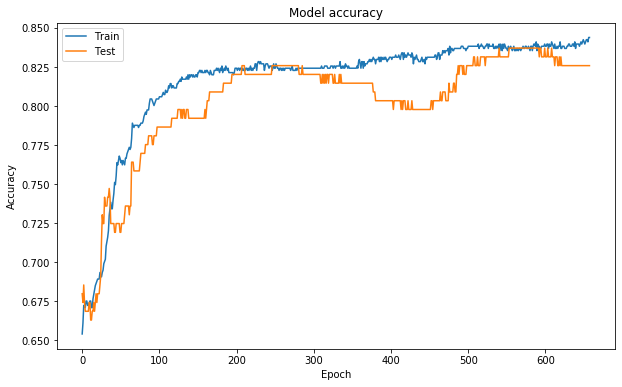

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.ylim(0.55,0.8)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

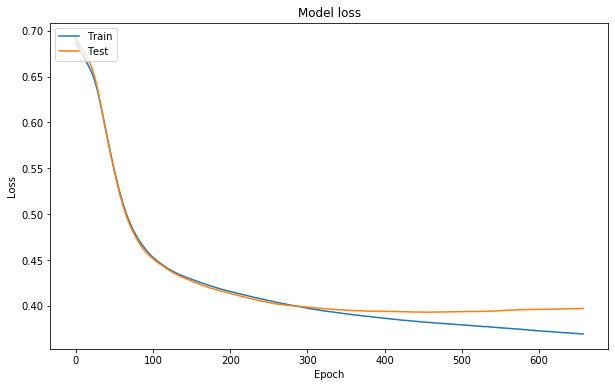

In [82]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
#plt.ylim(0.45,0.7)
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [83]:
y_pred = model.predict(X_train)

In [84]:
y_pred

array([[0.16567144],
       [0.08053362],
       [0.98167825],
       [0.87490535],
       [0.46462324],
       [0.19566801],
       [0.5196378 ],
       [0.05832252],
       [0.21953729],
       [0.71152675],
       [0.09023303],
       [0.992491  ],
       [0.3581217 ],
       [0.39284608],
       [0.07829136],
       [0.9109095 ],
       [0.07832149],
       [0.05946323],
       [0.15248719],
       [0.1015552 ],
       [0.09330177],
       [0.93498725],
       [0.68542767],
       [0.02722302],
       [0.94838667],
       [0.3958163 ],
       [0.93317735],
       [0.08167696],
       [0.07364899],
       [0.0401051 ],
       [0.10244927],
       [0.3503551 ],
       [0.57967436],
       [0.08938226],
       [0.30635858],
       [0.39025712],
       [0.19492707],
       [0.5809338 ],
       [0.42906004],
       [0.09225088],
       [0.2648033 ],
       [0.08538833],
       [0.8409882 ],
       [0.13036832],
       [0.21953729],
       [0.10225904],
       [0.48641527],
       [0.921